### Linear Regression

In [98]:
# models are nothing but just a line, a surface, a plane

# model will have two dimension
# feature space can three dimensional
# x Central value is the value which represent all the data point nature
# variance give the relability of the central value.
# if variance is large then relability of the central value is low and
#if the variance is low then reliability of the central value is high

# independent variable should not have covariance and target variable and independent variable will have the covariance
# best fit line := the line which pass through maximum number of data point is called best fit line. And minimizes the distance 
#between other points.
# error should be minimum.
# y = mx + c in case of linear regression. it linear because the coeffincient of m and c have power one (1), not x
# y = m1x + m2x^2 + c it is alos linear resgression model for data science.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
from sklearn.linear_model import LinearRegression

In [168]:
data = pd.read_csv(r'D:\machine learning using python\jupyter notebook code\Data science\data\autos_imports-85.csv')

In [169]:
data = pd.DataFrame(data)

In [170]:
data.shape

(205, 24)

In [171]:
data.head()

symboling normalized-losses make fuel-type   aspiration  \
3 NaN    alfa-romero               gas  std       two  convertible   
  NaN    alfa-romero               gas  std       two  convertible   
1 NaN    alfa-romero               gas  std       two    hatchback   
2 164.0         audi               gas  std      four        sedan   
  164.0         audi               gas  std      four        sedan   

        num-of-doors body-style  drive-wheels  wheel-base  length  ...  \
3 NaN            rwd      front          88.6       168.8    64.1  ...   
  NaN            rwd      front          88.6       168.8    64.1  ...   
1 NaN            rwd      front          94.5       171.2    65.5  ...   
2 164.0          fwd      front          99.8       176.6    66.2  ...   
  164.0          4wd      front          99.4       176.6    66.4  ...   

         num-of-cylinders  engine-size fuel-system  bore  stroke  \
3 NaN                 130         mpfi        3.47  2.68     9.0   
  NaN                 130         mpfi        3.47  2.68     9.0   
1 NaN                 152         mpfi        2.68  3.47     9.0   
2 164.0               109         mpfi        3.19  3.40    10.0   
  164.0               136         mpfi        3.19  3.40     8.0   

        compression-ratio  horsepower-peak-rpm  city-mpg  highway-mpg    price  
3 NaN               111.0               5000.0        21           27  13495.0  
  NaN               111.0               5000.0        21           27  16500.0  
1 NaN               154.0               5000.0        19           26  16500.0  
2 164.0             102.0               5500.0        24           30  13950.0  
  164.0             115.0               5500.0        18           22  17450.0  

[5 rows x 24 columns]

In [172]:
data.describe()

,drive-wheels,wheel-base,length,width,height,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,horsepower-peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [173]:
data.head(5).transpose()

3                         1      2       
                             NaN          NaN          NaN  164.0  164.0
symboling            alfa-romero  alfa-romero  alfa-romero   audi   audi
normalized-losses            gas          gas          gas    gas    gas
make                         std          std          std    std    std
fuel-type                    two          two          two   four   four
aspiration           convertible  convertible    hatchback  sedan  sedan
num-of-doors                 rwd          rwd          rwd    fwd    4wd
body-style                 front        front        front  front  front
drive-wheels                88.6         88.6         94.5   99.8   99.4
wheel-base                 168.8        168.8        171.2  176.6  176.6
length                      64.1         64.1         65.5   66.2   66.4
width                       48.8         48.8         52.4   54.3   54.3
height                      2548         2548         2823   2337   2824
curb-weight                 dohc         dohc         ohcv    ohc    ohc
engine-type                 four         four          six   four   five
num-of-cylinders             130          130          152    109    136
engine-size                 mpfi         mpfi         mpfi   mpfi   mpfi
fuel-system                 3.47         3.47         2.68   3.19   3.19
bore                        2.68         2.68         3.47    3.4    3.4
stroke                         9            9            9     10      8
compression-ratio            111          111          154    102    115
horsepower-peak-rpm         5000         5000         5000   5500   5500
city-mpg                      21           21           19     24     18
highway-mpg                   27           27           26     30     22
price                      13495        16500        16500  13950  17450

In [174]:
data.dtypes

symboling               object
normalized-losses       object
make                    object
fuel-type               object
aspiration              object
num-of-doors            object
body-style              object
drive-wheels           float64
wheel-base             float64
length                 float64
width                  float64
height                   int64
curb-weight             object
engine-type             object
num-of-cylinders         int64
engine-size             object
fuel-system            float64
bore                   float64
stroke                 float64
compression-ratio      float64
horsepower-peak-rpm    float64
city-mpg                 int64
highway-mpg              int64
price                  float64
dtype: object

In [175]:
# low variance filter : we drop object column because the price is not going depend on these features so we drop them

In [176]:
# drop the following columns
#symboling               object
#normalized-losses       object
#make                    object
#fuel-type               object
#aspiration              object
#'num-of-doors'            object
#body-style              object
#curb-weight             object
#engine-type             object

In [177]:
data = data.drop('symboling', axis=1)
data = data.drop('normalized-losses', axis=1)
data = data.drop('make', axis=1)
data = data.drop('fuel-type', axis=1)
data = data.drop('aspiration', axis=1)
data = data.drop('num-of-doors', axis=1)
data = data.drop('body-style', axis=1)
data = data.drop('curb-weight', axis=1)

In [178]:
#data = pd.read_csv(r'D:\machine learning using python\jupyter notebook code\Data science\data\autos_imports-85.csv') 
#df = data.drop(columns=['symboling','normalized-losses','make'])

In [179]:
data.dtypes

drive-wheels           float64
wheel-base             float64
length                 float64
width                  float64
height                   int64
engine-type             object
num-of-cylinders         int64
engine-size             object
fuel-system            float64
bore                   float64
stroke                 float64
compression-ratio      float64
horsepower-peak-rpm    float64
city-mpg                 int64
highway-mpg              int64
price                  float64
dtype: object

In [180]:
data.shape

(205, 16)

In [181]:
data.head(2).transpose()

3       
                       NaN    NaN
drive-wheels          88.6   88.6
wheel-base           168.8  168.8
length                64.1   64.1
width                 48.8   48.8
height                2548   2548
engine-type           four   four
num-of-cylinders       130    130
engine-size           mpfi   mpfi
fuel-system           3.47   3.47
bore                  2.68   2.68
stroke                   9      9
compression-ratio      111    111
horsepower-peak-rpm   5000   5000
city-mpg                21     21
highway-mpg             27     27
price                13495  16500

In [182]:
data = data.drop('engine-size', axis=1)

In [183]:
data.shape

(205, 15)

In [184]:
data.head(3).transpose()

3             1
                       NaN    NaN    NaN
drive-wheels          88.6   88.6   94.5
wheel-base           168.8  168.8  171.2
length                64.1   64.1   65.5
width                 48.8   48.8   52.4
height                2548   2548   2823
engine-type           four   four    six
num-of-cylinders       130    130    152
fuel-system           3.47   3.47   2.68
bore                  2.68   2.68   3.47
stroke                   9      9      9
compression-ratio      111    111    154
horsepower-peak-rpm   5000   5000   5000
city-mpg                21     21     19
highway-mpg             27     27     26
price                13495  16500  16500

In [185]:
data.dtypes

drive-wheels           float64
wheel-base             float64
length                 float64
width                  float64
height                   int64
engine-type             object
num-of-cylinders         int64
fuel-system            float64
bore                   float64
stroke                 float64
compression-ratio      float64
horsepower-peak-rpm    float64
city-mpg                 int64
highway-mpg              int64
price                  float64
dtype: object

In [186]:
# Replace the data of object type with number
data['engine-type'] = data['engine-type'].replace({'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12})

In [187]:
data.dtypes

drive-wheels           float64
wheel-base             float64
length                 float64
width                  float64
height                   int64
engine-type              int64
num-of-cylinders         int64
fuel-system            float64
bore                   float64
stroke                 float64
compression-ratio      float64
horsepower-peak-rpm    float64
city-mpg                 int64
highway-mpg              int64
price                  float64
dtype: object

In [188]:
data.head()

drive-wheels  wheel-base  length  width  height  engine-type  \
3 NaN            88.6       168.8    64.1   48.8    2548            4   
  NaN            88.6       168.8    64.1   48.8    2548            4   
1 NaN            94.5       171.2    65.5   52.4    2823            6   
2 164.0          99.8       176.6    66.2   54.3    2337            4   
  164.0          99.4       176.6    66.4   54.3    2824            5   

         num-of-cylinders  fuel-system  bore  stroke  compression-ratio  \
3 NaN                 130         3.47  2.68     9.0              111.0   
  NaN                 130         3.47  2.68     9.0              111.0   
1 NaN                 152         2.68  3.47     9.0              154.0   
2 164.0               109         3.19  3.40    10.0              102.0   
  164.0               136         3.19  3.40     8.0              115.0   

         horsepower-peak-rpm  city-mpg  highway-mpg    price  
3 NaN                 5000.0        21           27  13495.0  
  NaN                 5000.0        21           27  16500.0  
1 NaN                 5000.0        19           26  16500.0  
2 164.0               5500.0        24           30  13950.0  
  164.0               5500.0        18           22  17450.0

In [189]:
data.dtypes

drive-wheels           float64
wheel-base             float64
length                 float64
width                  float64
height                   int64
engine-type              int64
num-of-cylinders         int64
fuel-system            float64
bore                   float64
stroke                 float64
compression-ratio      float64
horsepower-peak-rpm    float64
city-mpg                 int64
highway-mpg              int64
price                  float64
dtype: object

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 205 entries, (3, nan) to (-1, 95.0)
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   drive-wheels         205 non-null    float64
 1   wheel-base           205 non-null    float64
 2   length               205 non-null    float64
 3   width                205 non-null    float64
 4   height               205 non-null    int64  
 5   engine-type          205 non-null    int64  
 6   num-of-cylinders     205 non-null    int64  
 7   fuel-system          201 non-null    float64
 8   bore                 201 non-null    float64
 9   stroke               205 non-null    float64
 10  compression-ratio    203 non-null    float64
 11  horsepower-peak-rpm  203 non-null    float64
 12  city-mpg             205 non-null    int64  
 13  highway-mpg          205 non-null    int64  
 14  price                201 non-null    float64
dtypes: float64(10), int64(5)
m

In [192]:
data.head(2)

drive-wheels  wheel-base  length  width  height  engine-type  \
3 NaN          88.6       168.8    64.1   48.8    2548            4   
  NaN          88.6       168.8    64.1   48.8    2548            4   

       num-of-cylinders  fuel-system  bore  stroke  compression-ratio  \
3 NaN               130         3.47  2.68     9.0              111.0   
  NaN               130         3.47  2.68     9.0              111.0   

       horsepower-peak-rpm  city-mpg  highway-mpg    price  
3 NaN               5000.0        21           27  13495.0  
  NaN               5000.0        21           27  16500.0

### Convert object type column into float

In [193]:
#data['engine-type'] = data['engine-type'].astype('float64')

### One hot coding

In [69]:
# One hot coding
# Gender M and F can be write in form of this

#             Gender_M  Gender_F
#               1          0
#               0          1

In [197]:
### Replace ? to nan

In [198]:

data = data.replace('?', np.nan)

### Fil missing value / NAN with median value of the that column 

In [195]:
data['price'] = data['price'].fillna(data['price'].median())

data['drive-wheels'] = data['drive-wheels'].fillna(data['drive-wheels'].median())


In [196]:
data.head(2).transpose()

3          
                          NaN       NaN
drive-wheels            88.60     88.60
wheel-base             168.80    168.80
length                  64.10     64.10
width                   48.80     48.80
height                2548.00   2548.00
engine-type              4.00      4.00
num-of-cylinders       130.00    130.00
fuel-system              3.47      3.47
bore                     2.68      2.68
stroke                   9.00      9.00
compression-ratio      111.00    111.00
horsepower-peak-rpm   5000.00   5000.00
city-mpg                21.00     21.00
highway-mpg             27.00     27.00
price                13495.00  16500.00

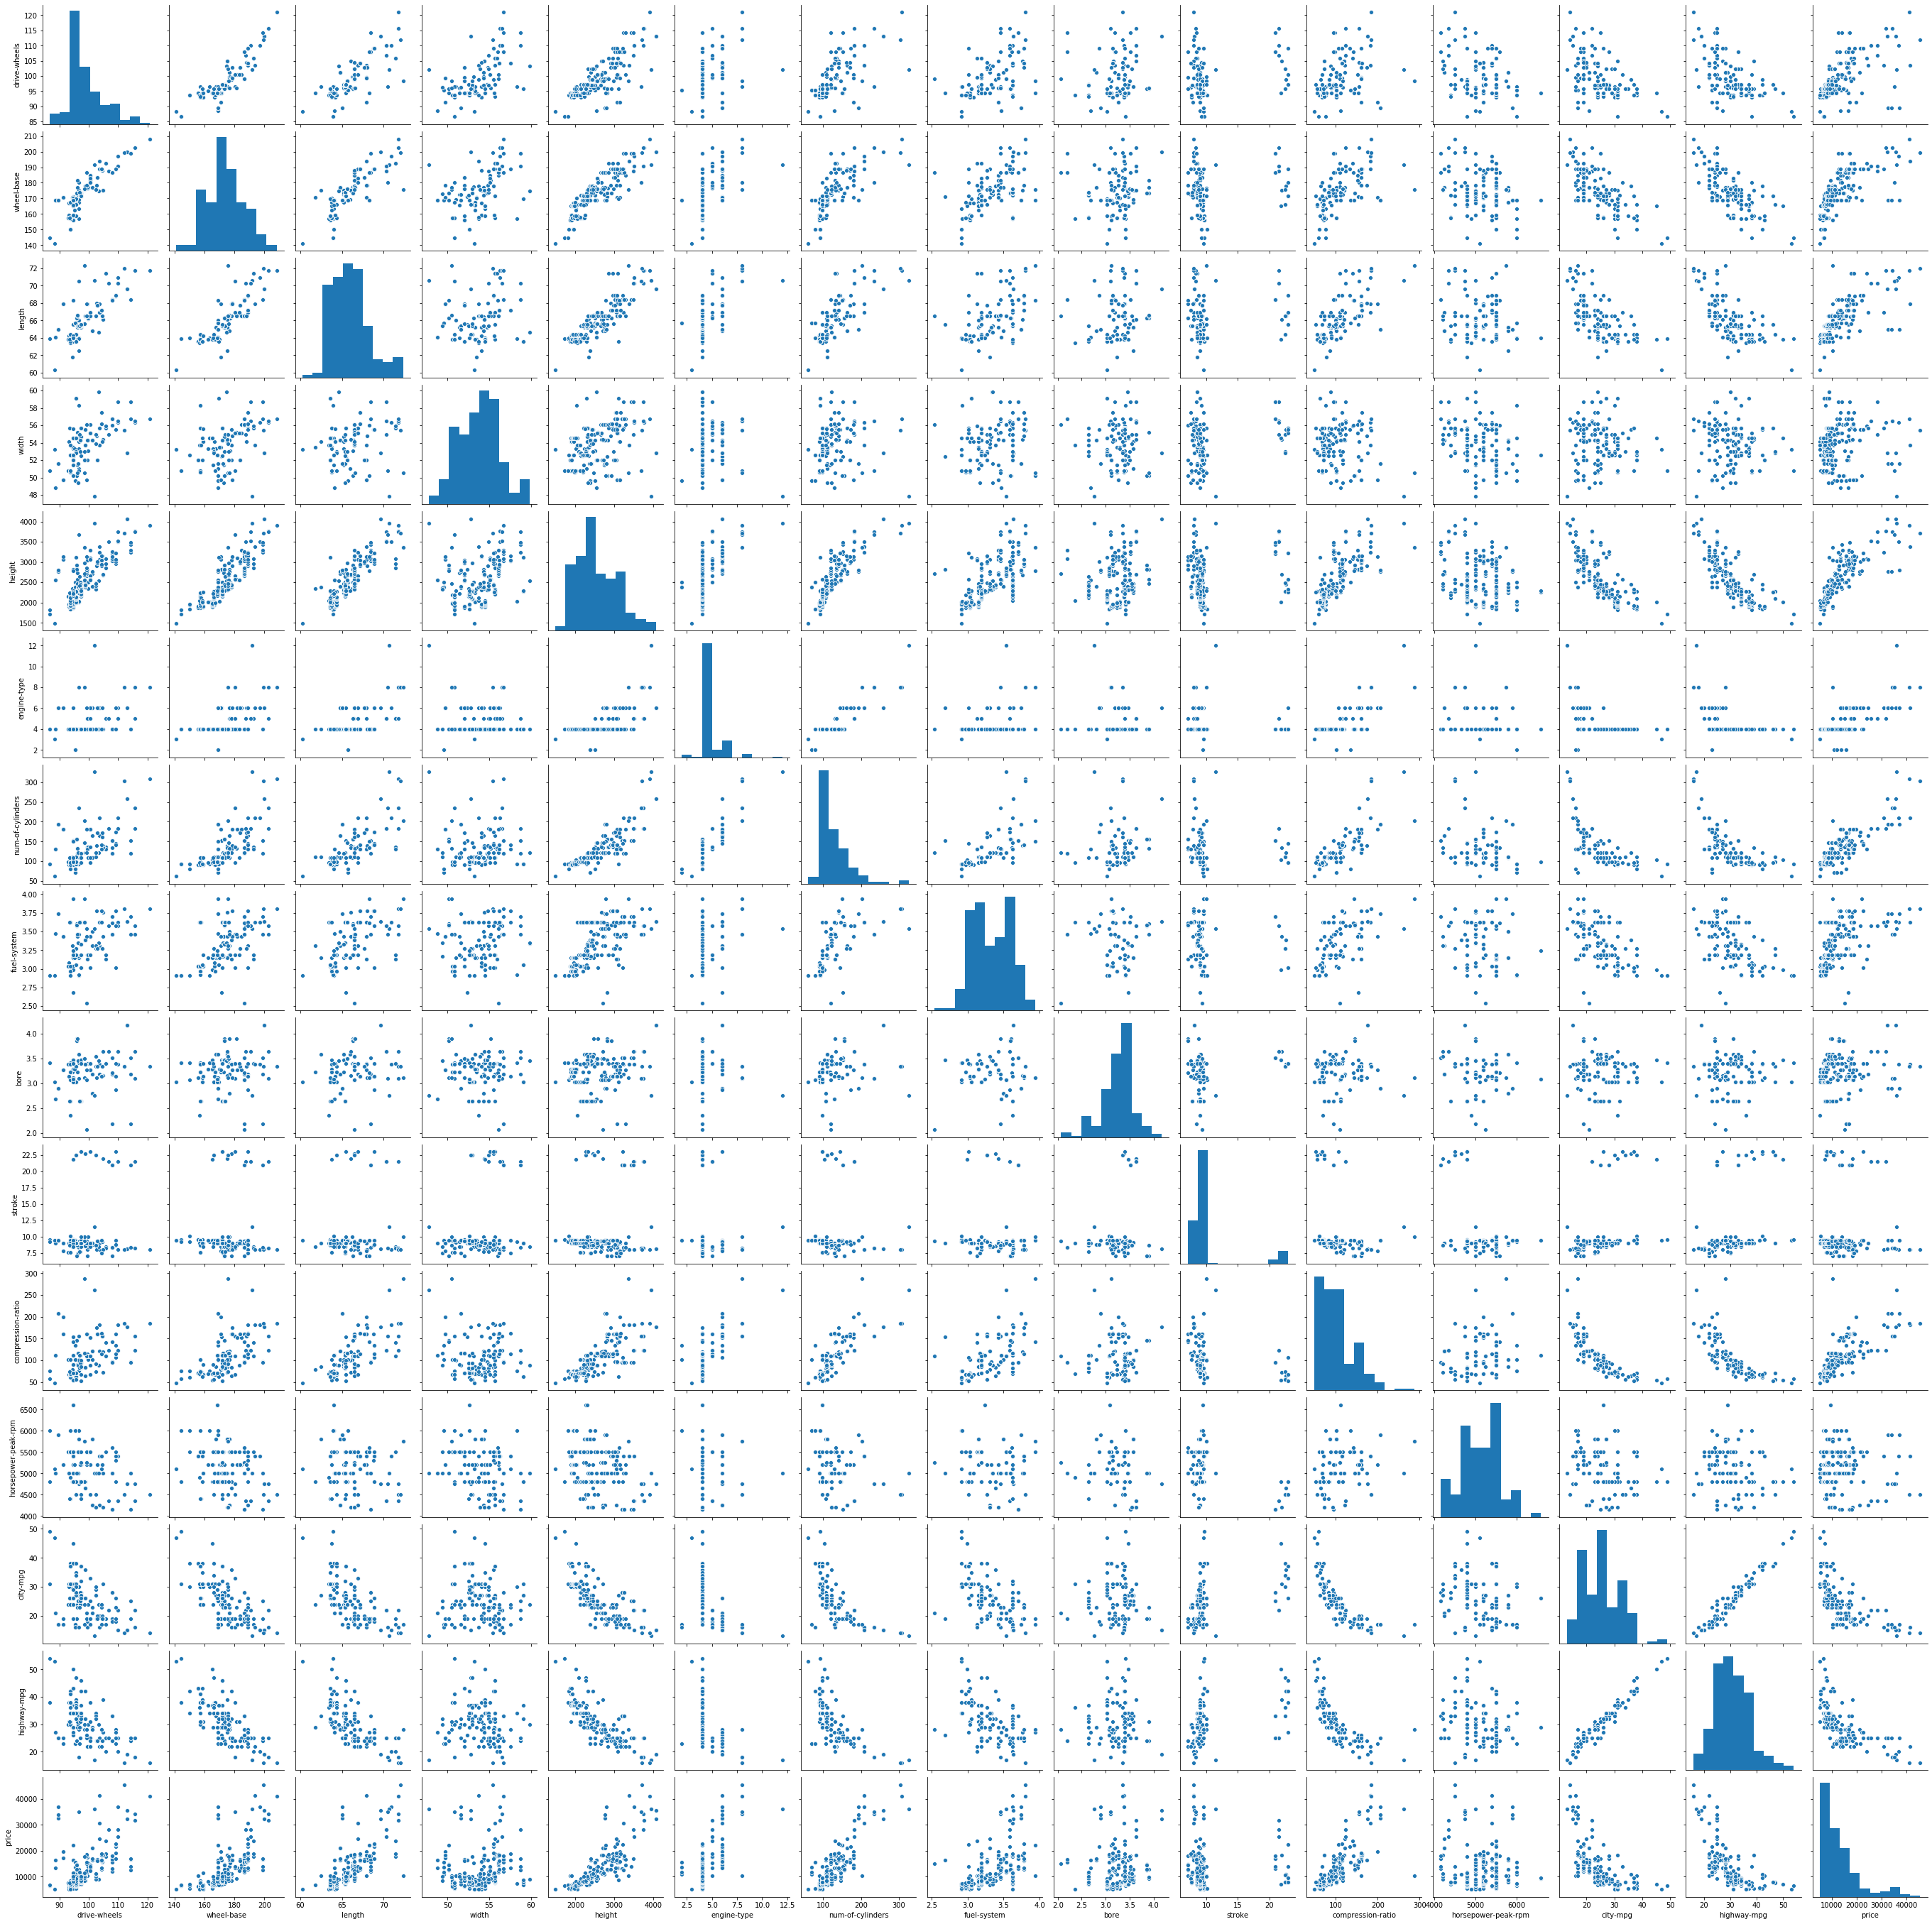

In [202]:
import seaborn as sns
sns.pairplot(data)
plt.show()

### Create dataset to for linear regression

In [209]:
X = data.drop('price', axis=1)
X = X.fillna(X.median())

In [210]:
y= data[['price']]

In [211]:
X.shape, y.shape

((205, 14), (205, 1))

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [214]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [223]:
acc = regression_model.score(X_test, y_test)

In [224]:
print("Accuracy of our model is ", acc)

Accuracy of our model is  0.8361759384091536
